In [5]:
# Desarrollo de modelo que busca predecir el precio de un auto dadas una serie
# de caracteristicas
# Se carga df con datos factorizados previamente
import pandas as pd
import numpy as np
import joblib

df = pd.read_csv("C:\\Users\\sergi\\Proyectos\\Proyecto_Final\\data\\processed\\vehicles_clean_fact.csv", quotechar='"')


In [6]:
# Se eliminan columnas lat y long.  Se cuenta con la columna estado
df = df.drop(columns = ['lat', 'long'])
df

,price,year,manufacturer,model,fuel,odometer,transmission,drive,size,type,state
0,22590,2010.0,0,0,0,71229.0,0,0,0,0,0
1,30990,2017.0,1,1,0,41124.0,0,0,0,0,0
2,15000,2013.0,2,2,0,128000.0,1,1,0,1,0
3,35000,2019.0,1,3,0,43000.0,1,0,1,1,0
4,29990,2016.0,0,4,0,17302.0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
251769,5477,2003.0,4,93,0,168055.0,1,0,1,5,50
251770,29590,2016.0,1,143,0,53475.0,1,0,0,5,50
251771,32590,2020.0,11,395,0,19059.0,0,1,2,6,50
251772,33590,2018.0,18,1445,0,30814.0,1,1,1,6,50


In [7]:
# Se escalan las variables como paso previo al entrenamiento de los modelos

from sklearn.preprocessing import MinMaxScaler

num_variables = ['year','manufacturer','model','fuel','odometer','transmission','drive','size','type','state']

scaler = MinMaxScaler()
variables_escaladas = scaler.fit_transform(df[num_variables])
df_escalado = pd.DataFrame(variables_escaladas, index=df.index, columns=num_variables)

# Incluir la característica price sin escalar
df_escalado['price'] = df['price']

joblib.dump(scaler, 'fit_transform.pkl')

df_escalado

,year,manufacturer,model,fuel,odometer,transmission,drive,size,type,state,price
0,0.52,0.000000,0.000000,0.0,0.284916,0.0,0.0,0.000000,0.000000,0.0,22590
1,0.80,0.026316,0.000123,0.0,0.164496,0.0,0.0,0.000000,0.000000,0.0,30990
2,0.64,0.052632,0.000246,0.0,0.512000,0.5,0.5,0.000000,0.083333,0.0,15000
3,0.88,0.026316,0.000370,0.0,0.172000,0.5,0.0,0.333333,0.083333,0.0,35000
4,0.76,0.000000,0.000493,0.0,0.069208,0.0,0.0,0.333333,0.000000,0.0,29990
...,...,...,...,...,...,...,...,...,...,...,...
251769,0.24,0.105263,0.011460,0.0,0.672220,0.5,0.0,0.333333,0.416667,1.0,5477
251770,0.76,0.026316,0.017622,0.0,0.213900,0.5,0.0,0.000000,0.416667,1.0,29590
251771,0.92,0.289474,0.048675,0.0,0.076236,0.0,0.5,0.666667,0.500000,1.0,32590
251772,0.84,0.473684,0.178065,0.0,0.123256,0.5,0.5,0.333333,0.500000,1.0,33590


In [8]:
from sklearn.model_selection import train_test_split

X = df_escalado.drop(['price'], axis=1)  
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Se entrenan los siguientes modelos y se evalua el error medio y el R2 de cada uno con
# el objetivo de identificar el mejor modelo

from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor


# Lista de modelos de regresión
regression_models = [
    GradientBoostingRegressor(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    KNeighborsRegressor(),
    Lasso(max_iter=10000),
    SGDRegressor(max_iter=10000),
    XGBRegressor()
]

# Entrenar y evaluar los modelos de regresión
print("Modelos de Regresión:")
for model in regression_models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"{type(model).__name__} R2 Score: {r2:.2f}")
    print(f"{type(model).__name__} RMSE: {rmse:.2f}")


Modelos de Regresión:
GradientBoostingRegressor R2 Score: 0.80
GradientBoostingRegressor RMSE: 5116.41
DecisionTreeRegressor R2 Score: 0.85
DecisionTreeRegressor RMSE: 4384.77
RandomForestRegressor R2 Score: 0.92
RandomForestRegressor RMSE: 3235.45
KNeighborsRegressor R2 Score: 0.84
KNeighborsRegressor RMSE: 4562.96
Lasso R2 Score: 0.66
Lasso RMSE: 6643.98
SGDRegressor R2 Score: 0.66
SGDRegressor RMSE: 6644.09
XGBRegressor R2 Score: 0.88
XGBRegressor RMSE: 3915.34


In [10]:
# Guardamos el modelo con el menor error, 
Modelo_Random_Forest_Base_Completa = RandomForestRegressor(random_state=42)
Modelo_Random_Forest_Base_Completa.fit(X_train, y_train)
y_pred = Modelo_Random_Forest_Base_Completa.predict(X_test)
r2_score(y_test, y_pred)

0.9181515586304416

In [8]:
# Guardamos el modelo con el menor error
from pickle import dump
dump(Modelo_Random_Forest_Base_Completa,open("C:\\Users\\sergi\\Proyectos\\Proyecto_Final\\models\\Modelo_RF_datos_escalados","wb"))


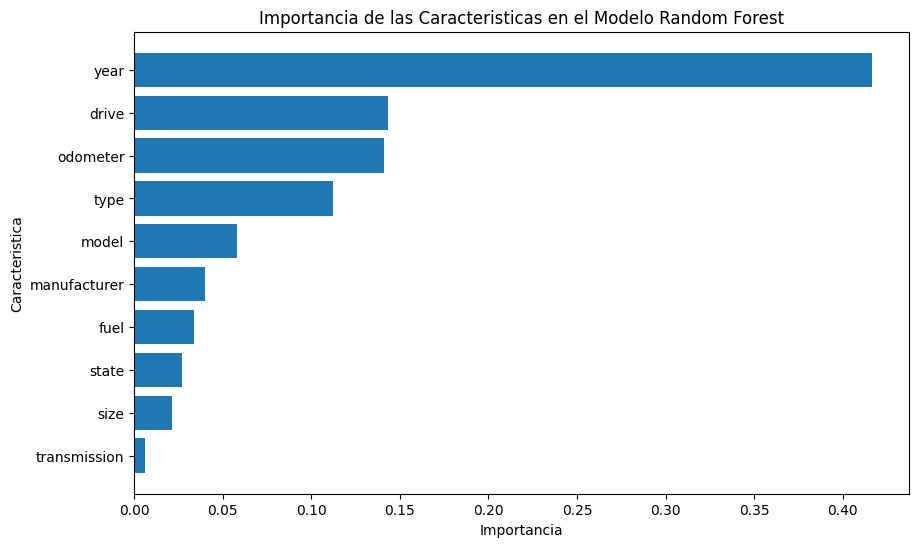

In [12]:
import matplotlib.pyplot as plt

modelo = Modelo_Random_Forest_Base_Completa

# Obtener las importancias de las características
importancia_caracteristicas = modelo.feature_importances_

# Crear un dataframe para visualizar mejor las importancias
importancia_df = pd.DataFrame({'Caracteristica': X.columns, 'Importancia': importancia_caracteristicas})

# Ordenar el dataframe por importancia
importancia_df = importancia_df.sort_values(by='Importancia', ascending=False)

# Visualizar las importancias
plt.figure(figsize=(10, 6))
plt.barh(importancia_df['Caracteristica'], importancia_df['Importancia'])
plt.xlabel('Importancia')
plt.ylabel('Caracteristica')
plt.title('Importancia de las Caracteristicas en el Modelo Random Forest')
plt.gca().invert_yaxis()  # Invertir el eje Y para mostrar la característica más importante en la parte superior
plt.show()